# Preparation

In [2]:
data = pd.read_csv("Investment_Data_Train.csv") #raw data
data_clean = data.dropna()
data_clean = data_clean.drop(columns='StateCode')
data_clean=data_clean.iloc[:,1:]

In [3]:
data_clean.head()

,MSN,Year,Amount,State,CO2 Emissions (Mmt),TotalNumberofInvestments,TotalAmountofAssistance
0,BDFDB,2015,21.0,Alaska,35.027804,16.0,3345612.0
1,BDPRP,2015,4.0,Alaska,35.027804,16.0,3345612.0
2,BFFDB,2015,21.0,Alaska,35.027804,16.0,3345612.0
3,BFPRP,2015,4.0,Alaska,35.027804,16.0,3345612.0
4,CLPRB,2015,17747.0,Alaska,35.027804,16.0,3345612.0


In [4]:
# one hot encode to make MSN 0-1
df_encoded = pd.get_dummies(data_clean, columns=['MSN'])

In [5]:
df_encoded.head()

,Year,Amount,State,CO2 Emissions (Mmt),TotalNumberofInvestments,TotalAmountofAssistance,MSN_BDFDB,MSN_BDPRP,MSN_BFFDB,MSN_BFPRP,...,MSN_REPRB,MSN_SOTCB,MSN_TEPRB,MSN_TETCB,MSN_WDEXB,MSN_WDPRB,MSN_WDTCB,MSN_WSTCB,MSN_WWPRB,MSN_WYTCB
0,2015,21.0,Alaska,35.027804,16.0,3345612.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,4.0,Alaska,35.027804,16.0,3345612.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,21.0,Alaska,35.027804,16.0,3345612.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,4.0,Alaska,35.027804,16.0,3345612.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2015,17747.0,Alaska,35.027804,16.0,3345612.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# calculate Amount * MSN
for idx in range(6,35):
    df_encoded.iloc[:,idx] = np.array(df_encoded.iloc[:,idx]) * np.array(df_encoded['Amount'])

In [7]:
df_encoded.head()

,Year,Amount,State,CO2 Emissions (Mmt),TotalNumberofInvestments,TotalAmountofAssistance,MSN_BDFDB,MSN_BDPRP,MSN_BFFDB,MSN_BFPRP,...,MSN_REPRB,MSN_SOTCB,MSN_TEPRB,MSN_TETCB,MSN_WDEXB,MSN_WDPRB,MSN_WDTCB,MSN_WSTCB,MSN_WWPRB,MSN_WYTCB
0,2015,21.0,Alaska,35.027804,16.0,3345612.0,21.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,4.0,Alaska,35.027804,16.0,3345612.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,21.0,Alaska,35.027804,16.0,3345612.0,0.0,0.0,21.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,4.0,Alaska,35.027804,16.0,3345612.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,17747.0,Alaska,35.027804,16.0,3345612.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# replace Amount and MSN with Amount * MSN
df_new1 = df_encoded.drop(columns="Amount")

In [9]:
df_new1.head() 

,Year,State,CO2 Emissions (Mmt),TotalNumberofInvestments,TotalAmountofAssistance,MSN_BDFDB,MSN_BDPRP,MSN_BFFDB,MSN_BFPRP,MSN_CLPRB,...,MSN_REPRB,MSN_SOTCB,MSN_TEPRB,MSN_TETCB,MSN_WDEXB,MSN_WDPRB,MSN_WDTCB,MSN_WSTCB,MSN_WWPRB,MSN_WYTCB
0,2015,Alaska,35.027804,16.0,3345612.0,21.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015,Alaska,35.027804,16.0,3345612.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015,Alaska,35.027804,16.0,3345612.0,0.0,0.0,21.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,Alaska,35.027804,16.0,3345612.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,Alaska,35.027804,16.0,3345612.0,0.0,0.0,0.0,0.0,17747.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# put MSN in one line for each year & state
df_new2 = df_new1.groupby(by=['Year', 'State','CO2 Emissions (Mmt)','TotalNumberofInvestments','TotalAmountofAssistance']).sum()

In [12]:
# group each year & state MSN * Amount
df_new3.head()

,Year,State,CO2 Emissions (Mmt),TotalNumberofInvestments,TotalAmountofAssistance,MSN_BDFDB,MSN_BDPRP,MSN_BFFDB,MSN_BFPRP,MSN_CLPRB,...,MSN_REPRB,MSN_SOTCB,MSN_TEPRB,MSN_TETCB,MSN_WDEXB,MSN_WDPRB,MSN_WDTCB,MSN_WSTCB,MSN_WWPRB,MSN_WYTCB
0,2015,Alabama,119.200889,164.0,1864412.0,1933.0,356.0,1933.0,356.0,331420.0,...,258955.0,101.0,1267004.0,1917138.0,0.0,163313.0,163313.0,1565.0,164877.0,0.0
1,2015,Alaska,35.027804,16.0,3345612.0,21.0,4.0,21.0,4.0,17747.0,...,23807.0,3.0,2044184.0,0.0,0.0,6865.0,6865.0,622.0,7488.0,1488.0
2,2015,Arizona,94.978784,65.0,1724853.0,12.0,2.0,6602.0,1157.0,146450.0,...,128954.0,48229.0,615867.0,1495858.0,0.0,8001.0,8001.0,658.0,8659.0,4213.0
3,2015,Arkansas,59.053365,477.0,13453887.0,4429.0,815.0,4429.0,815.0,1819.0,...,117840.0,124.0,1331452.0,1062359.0,0.0,75417.0,75417.0,3799.0,79217.0,0.0
4,2015,California,351.408516,1023.0,30077512.0,4057.0,747.0,30601.0,5397.0,0.0,...,737527.0,211839.0,2352883.0,7525491.0,0.0,98852.0,98852.0,40708.0,139561.0,113967.0


In [13]:
# make TotalAmountofAssistance as the last column; easy to process
df_assi = df_new3['TotalAmountofAssistance']
df_new3 = df_new3.drop(['TotalAmountofAssistance'],axis=1)
df_new3['TotalAmountofAssistance']=df_assi

In [14]:
df_new3.head()

,Year,State,CO2 Emissions (Mmt),TotalNumberofInvestments,MSN_BDFDB,MSN_BDPRP,MSN_BFFDB,MSN_BFPRP,MSN_CLPRB,MSN_CLPRK,...,MSN_SOTCB,MSN_TEPRB,MSN_TETCB,MSN_WDEXB,MSN_WDPRB,MSN_WDTCB,MSN_WSTCB,MSN_WWPRB,MSN_WYTCB,TotalAmountofAssistance
0,2015,Alabama,119.200889,164.0,1933.0,356.0,1933.0,356.0,331420.0,25.122,...,101.0,1267004.0,1917138.0,0.0,163313.0,163313.0,1565.0,164877.0,0.0,1864412.0
1,2015,Alaska,35.027804,16.0,21.0,4.0,21.0,4.0,17747.0,15.073,...,3.0,2044184.0,0.0,0.0,6865.0,6865.0,622.0,7488.0,1488.0,3345612.0
2,2015,Arizona,94.978784,65.0,12.0,2.0,6602.0,1157.0,146450.0,21.522,...,48229.0,615867.0,1495858.0,0.0,8001.0,8001.0,658.0,8659.0,4213.0,1724853.0
3,2015,Arkansas,59.053365,477.0,4429.0,815.0,4429.0,815.0,1819.0,19.893,...,124.0,1331452.0,1062359.0,0.0,75417.0,75417.0,3799.0,79217.0,0.0,13453887.0
4,2015,California,351.408516,1023.0,4057.0,747.0,30601.0,5397.0,0.0,0.000,...,211839.0,2352883.0,7525491.0,0.0,98852.0,98852.0,40708.0,139561.0,113967.0,30077512.0


In [15]:
# one hot encoding: make state as categorical variable
df_new4 = pd.get_dummies(df_new3, columns=['State'])

In [16]:
df_assi = df_new4['TotalAmountofAssistance']
df_new4 = df_new4.drop(['TotalAmountofAssistance'],axis=1)
df_new4['TotalAmountofAssistance']=df_assi

In [17]:
# state to 0-1 variable
df_new4.head()

,Year,CO2 Emissions (Mmt),TotalNumberofInvestments,MSN_BDFDB,MSN_BDPRP,MSN_BFFDB,MSN_BFPRP,MSN_CLPRB,MSN_CLPRK,MSN_CLPRP,...,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,TotalAmountofAssistance
0,2015,119.200889,164.0,1933.0,356.0,1933.0,356.0,331420.0,25.122,13193.0,...,0,0,0,0,0,0,0,0,0,1864412.0
1,2015,35.027804,16.0,21.0,4.0,21.0,4.0,17747.0,15.073,1177.0,...,0,0,0,0,0,0,0,0,0,3345612.0
2,2015,94.978784,65.0,12.0,2.0,6602.0,1157.0,146450.0,21.522,6805.0,...,0,0,0,0,0,0,0,0,0,1724853.0
3,2015,59.053365,477.0,4429.0,815.0,4429.0,815.0,1819.0,19.893,91.0,...,0,0,0,0,0,0,0,0,0,13453887.0
4,2015,351.408516,1023.0,4057.0,747.0,30601.0,5397.0,0.0,0.000,0.0,...,0,0,0,0,0,0,0,0,0,30077512.0


# (1)Model with group by year and state data

# (1.1) Linear

In [123]:
X = df_new3.iloc[:,:-1]
y = df_new3['TotalAmountofAssistance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [124]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [128]:
linear_model = sm.OLS.from_formula('TotalAmountofAssistance ~ C(State) + TotalNumberofInvestments + MSN_BDFDB + MSN_NGMPP + MSN_WWPRB + MSN_WSTCB + MSN_WDTCB + MSN_WDPRB + MSN_WDEXB + MSN_TETCB + MSN_TEPRB + MSN_SOTCB + MSN_REPRB + MSN_PAPRP + MSN_PAPRB + MSN_NUETB + MSN_NGMPK + MSN_BDPRP + MSN_NGMPB + MSN_NCPRB + MSN_HYTCB + MSN_GETCB + MSN_ENPRP + MSN_EMFDB + MSN_COPRK + MSN_CLPRP + MSN_CLPRK + MSN_CLPRB + MSN_BFPRP + MSN_BFFDB + MSN_WYTCB', data=train)
result = linear_model.fit()
y_predicted = result.predict(test)
MSE = mean_squared_error(test['TotalAmountofAssistance'], y_predicted)
RMSE = math.sqrt(MSE)

In [130]:
RMSE

153928095447.2145

In [213]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     TotalAmountofAssistance   R-squared:                       0.612
Model:                                 OLS   Adj. R-squared:                  0.356
Method:                      Least Squares   F-statistic:                     2.395
Date:                     Sat, 28 Jan 2023   Prob (F-statistic):           7.52e-06
Time:                             22:11:24   Log-Likelihood:                -3726.2
No. Observations:                      200   AIC:                             7612.
Df Residuals:                          120   BIC:                             7876.
Df Model:                               79                                         
Covariance Type:                 nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   1.261e+09   2.83e+09      0.446      0.656   -4.34e+09    6.86e+09
C(State)[T.Alaska]         -2.759e+08   2.64e+08     -1.044      0.298   -7.99e+08    2.47e+08
C(State)[T.Arizona]        -2.219e+08   2.04e+08     -1.088      0.279   -6.26e+08    1.82e+08
C(State)[T.Arkansas]       -1.561e+08    1.6e+08     -0.973      0.333   -4.74e+08    1.62e+08
C(State)[T.California]      1.065e+09   7.27e+08      1.464      0.146   -3.75e+08     2.5e+09
C(State)[T.Colorado]       -3.725e+08   2.47e+08     -1.511      0.133   -8.61e+08    1.16e+08
C(State)[T.Connecticut]    -1.213e+09   2.81e+09     -0.431      0.667   -6.78e+09    4.36e+09
C(State)[T.Delaware]       -1.264e+09   2.82e+09     -0.448      0.655   -6.86e+09    4.33e+09
C(State)[T.Florida]         4.816e+07   3.24e+08      0.148      0.882   -5.94e+08    6.91e+08
C(State)[T.Georgia]        -9.303e+08   2.74e+09     -0.340      0.735   -6.35e+09    4.49e+09
C(State)[T.Hawaii]         -1.245e+09   2.82e+09     -0.441      0.660   -6.84e+09    4.35e+09
C(State)[T.Idaho]          -2.246e+08    2.3e+08     -0.977      0.331    -6.8e+08    2.31e+08
C(State)[T.Illinois]       -3.348e+08   3.42e+08     -0.980      0.329   -1.01e+09    3.42e+08
C(State)[T.Indiana]        -3.735e+08   2.75e+08     -1.358      0.177   -9.18e+08    1.71e+08
C(State)[T.Iowa]           -1.245e+09   2.89e+09     -0.431      0.667   -6.96e+09    4.47e+09
C(State)[T.Kansas]         -3.511e+08   2.54e+08     -1.380      0.170   -8.55e+08    1.52e+08
C(State)[T.Kentucky]       -3.453e+08   2.21e+08     -1.562      0.121   -7.83e+08    9.24e+07
C(State)[T.Louisiana]      -2.615e+08   2.12e+08     -1.236      0.219    -6.8e+08    1.57e+08
C(State)[T.Maine]          -1.097e+09    2.8e+09     -0.393      0.695   -6.63e+09    4.44e+09
C(State)[T.Maryland]       -1.101e+09   2.83e+09     -0.390      0.698    -6.7e+09    4.49e+09
C(State)[T.Massachusetts]   -1.24e+09   2.81e+09     -0.441      0.660   -6.81e+09    4.33e+09
C(State)[T.Michigan]       -1.134e+08   1.56e+08     -0.725      0.470   -4.23e+08    1.96e+08
C(State)[T.Minnesota]      -1.167e+09   2.81e+09     -0.416      0.678   -6.72e+09    4.39e+09
C(State)[T.Mississippi]    -1.796e+08    1.9e+08     -0.943      0.348   -5.57e+08    1.97e+08
C(State)[T.Missouri]       -2.433e+08   2.15e+08     -1.133      0.260   -6.68e+08    1.82e+08
C(State)[T.Montana]        -2.523e+08   2.51e+08     -1.005      0.317   -7.49e+08    2.45e+08
C(State)[T.Nebraska]       -3.368e+08   3.29e+08     -1.024      0.308   -9.88e+08    3.14e+08
C(State)[T.Nevada]          1.529e+08   3.09e+08      0.495      0.621   -4.58e+08    7.64e+08
C(State)[T.New Hampshire]  -1.165e+09   2.81e+09     -0.415      0.679   -6.73e+09 

# (1.2) SVM

In [104]:
param_test1 = {'C': [100, 1000, 10000,100000,100000, 10000000000]}
X = df_new4.iloc[:,:-1]
y = df_new4['TotalAmountofAssistance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Initialize the model
svc = svm.SVR()
clf = GridSearchCV(svc, param_test1)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 1000, 10000, 100000, 100000, 10000000000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [105]:
clf.best_params_

{'C': 100000}

In [119]:
rmse_svm1 = []
for dummy in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    regr = svm.SVR(C=100000)
    regr.fit(X_train, y_train)

    y_pred = regr.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = math.sqrt(MSE) 
    rmse_svm1.append(RMSE)
avg_rmse_svm1 = np.mean(rmse_svm1)    

Text(0.5, 1.0, 'RMSE SVM 250rows')

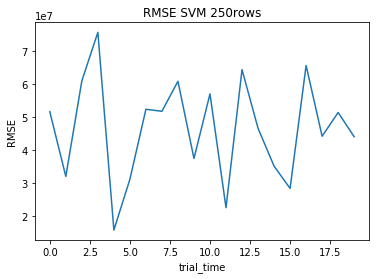

In [132]:
plt.plot(rmse_svm1)
plt.xlabel("trial_time")
plt.ylabel("RMSE")
plt.title("RMSE SVM 250rows")

In [122]:
avg_rmse_svm1

46478462.691257074

# (1.3) RandomForest

In [92]:
param_test2 = {'n_estimators':range(5,25,5), 'max_depth':[1,3,5,15]}
X = df_new4.iloc[:,:-1]
y = df_new4['TotalAmountofAssistance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Initialize the model
rf = RandomForestRegressor()

    # Fit the model to the training data

clf = GridSearchCV(rf, param_test2)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [93]:
clf.best_params_

{'max_depth': 5, 'n_estimators': 20}

In [110]:
rmse_forest1 = []
for dummy in range(20):
    # Split data into input features (X) and target variable (y)
    X = df_new4.iloc[:,:-1]
    y = df_new4['TotalAmountofAssistance']

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Initialize the model
    rf = RandomForestRegressor(n_estimators=20,max_depth=5)

    # Fit the model to the training data
    rf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)

    RMSE = math.sqrt(MSE)
    rmse_forest1.append(RMSE)
avg_rmse_forest1 = np.mean(rmse_forest1)

Text(0.5, 1.0, 'RMSE RandomForest 250rows')

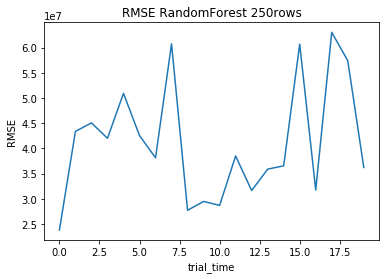

In [115]:
plt.plot(rmse_forest1)
plt.xlabel("trial_time")
plt.ylabel("RMSE")
plt.title("RMSE RandomForest 250rows")

In [116]:
avg_rmse_forest1

41203279.398228794

# Model(7250 rows)

In [133]:
# do not group, keep 7250rows
df_new5 = pd.get_dummies(df_new1, columns=['State'])
df_assi = df_new5['TotalAmountofAssistance']
df_new5 = df_new5.drop(['TotalAmountofAssistance'],axis=1)
df_new5['TotalAmountofAssistance']=df_assi

In [185]:
param_test3 = {'n_estimators':[50,70,90,120,150], 'max_depth':[40,60,90,120,150]}
X = df_new5.iloc[:,:-1]
y = df_new5['TotalAmountofAssistance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the model
rf = RandomForestRegressor()

# Fit the model to the training data

clf = GridSearchCV(rf, param_test3)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [189]:
clf.best_params_

{'max_depth': 90, 'n_estimators': 30}

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rmse_forest2=[]
for dummy in range(20):
    # Initialize the model
    rf = RandomForestRegressor(n_estimators=30,max_depth=90)

    # Fit the model to the training data
    rf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)

    RMSE = math.sqrt(MSE) 
    rmse_forest2.append(RMSE)
avg_rmse_forest2 = np.mean(rmse_forest2)

In [212]:
avg_rmse_forest2

134932.16682137537

# Test

In [39]:
test_2020 = pd.read_csv("Investment_Data_2020.csv")

In [40]:
test_2020_clean = test_2020.dropna()
test_2020_clean = test_2020_clean.drop(columns='StateCode')
test_2020_clean=test_2020_clean.iloc[:,1:]

In [41]:
test_2020_clean.head()

,MSN,Year,Amount,State,CO2 Emissions (Mmt),TotalNumberofInvestments,TotalAmountofAssistance
0,BDFDB,2020,0.0,Alaska,35.967527,37.0,9567164.0
1,BDPRP,2020,0.0,Alaska,35.967527,37.0,9567164.0
2,BFFDB,2020,0.0,Alaska,35.967527,37.0,9567164.0
3,BFPRP,2020,0.0,Alaska,35.967527,37.0,9567164.0
4,CLPRB,2020,15523.0,Alaska,35.967527,37.0,9567164.0


In [42]:
test_encoded = pd.get_dummies(test_2020_clean, columns=['MSN'])
for idx in range(6,35):
    test_encoded.iloc[:,idx] = np.array(test_encoded.iloc[:,idx]) * np.array(test_encoded['Amount'])

In [43]:
test_encoded.head()

,Year,Amount,State,CO2 Emissions (Mmt),TotalNumberofInvestments,TotalAmountofAssistance,MSN_BDFDB,MSN_BDPRP,MSN_BFFDB,MSN_BFPRP,...,MSN_REPRB,MSN_SOTCB,MSN_TEPRB,MSN_TETCB,MSN_WDEXB,MSN_WDPRB,MSN_WDTCB,MSN_WSTCB,MSN_WWPRB,MSN_WYTCB
0,2020,0.0,Alaska,35.967527,37.0,9567164.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,0.0,Alaska,35.967527,37.0,9567164.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,0.0,Alaska,35.967527,37.0,9567164.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020,0.0,Alaska,35.967527,37.0,9567164.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,15523.0,Alaska,35.967527,37.0,9567164.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
test_new1 = test_encoded.drop(columns="Amount")

In [46]:
test_new5 = pd.get_dummies(test_new1, columns=['State'])
test_assi = test_new5['TotalAmountofAssistance']
test_new5 = test_new5.drop(['TotalAmountofAssistance'],axis=1)
test_new5['TotalAmountofAssistance']=df_assi

In [194]:
# Make predictions on the test set
y_pred = rf.predict(test_new5.iloc[:,:-1])
MSE = mean_squared_error(test_new5['TotalAmountofAssistance'], y_pred)
 
RMSE = math.sqrt(MSE) 

In [195]:
RMSE 

51675575.89244933

In [197]:
y_pred.shape

(1450,)

In [204]:
output = test_2020_clean[['Year', 'State', 'TotalAmountofAssistance']]

In [207]:
output

,Year,State,TotalAmountofAssistance,Prediction
0,2020,Alaska,9567164.0,15985323.5
1,2020,Alaska,9567164.0,15985323.5
2,2020,Alaska,9567164.0,15985323.5
3,2020,Alaska,9567164.0,15985323.5
4,2020,Alaska,9567164.0,15985323.5
...,...,...,...,...
1503,2020,Wyoming,229763.0,543947.5
1504,2020,Wyoming,229763.0,543947.5
1505,2020,Wyoming,229763.0,543947.5
1506,2020,Wyoming,229763.0,543947.5


In [206]:
output['Prediction'] = y_pred

E:\Users\wangz\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [208]:
output=output.groupby(by=['Year','State']).mean()

In [210]:
output.to_csv("Prediction_2020.csv")